In [ ]:
# importing all necessary libraries to run the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

LookupError: ignored

In [ ]:
data = pd.read_csv("vaccination_all_tweets.csv") 
data.head(2)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False


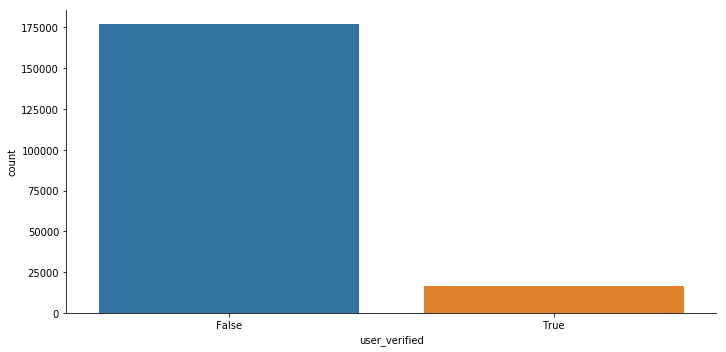

In [ ]:
import seaborn as sns
sns.catplot(data=data, x='user_verified', kind= 'count',height=5,aspect=2)
plt.savefig('USerVerification.pdf')
plt.savefig('USerVerification.jpg')
plt.show()

In [ ]:
data.user_verified.value_counts()

False    176937
True      16335
Name: user_verified, dtype: int64

In [ ]:
data.user_location.value_counts()

Bengaluru, India                  13397
India                              6690
Toronto, Canada  and Worldwide     2619
New Delhi, India                   2598
Mumbai, India                      1670
United States                      1652
New Delhi                          1037
Sri Lanka                          1036
Beijing, China                      919
Mumbai                              859
London, England                     855
Canada                              845
Toronto, Ontario                    819
Hyderabad, India                    736
Los Angeles, CA                     722
London                              714
Chennai, India                      664
Beijing                             633
Malaysia                            596
California, USA                     549
Pakistan                            546
Colombo, Sri Lanka                  536
USA                                 528
United Kingdom                      522
World                               515


In [ ]:
data = pd.read_csv("AstraZenecaSentiment.csv") 
data.head(2)

,Unnamed: 0,text,hashtags,Sentiment
0,0,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Negative
1,1,💉 #Vaccine #TrumpVaccine #AstraZeneca #PfizerB...,"['Vaccine', 'TrumpVaccine', 'AstraZeneca', 'Pf...",Negative


In [ ]:
data = pd.read_csv("ASinopharmSentiment.csv") 
data.head(2)

,Unnamed: 0,text,hashtags,Sentiment
0,0,#COVAX #ThePeoplesVaccine #COVID19 #Moderna #S...,"['COVAX', 'ThePeoplesVaccine', 'COVID19', 'Mod...",Negative
1,1,DO NOT TAKE THE VACCINE.\nhttps://t.co/MnqAyck...,"['SputnikV', 'PfizerBioNTech', 'Oxford', 'Astr...",Negative


In [ ]:
data = pd.read_csv("SputnikVSentiment.csv") 
data.head(2)

,Unnamed: 0,text,hashtags,Sentiment
0,0,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Negative
1,1,#vaccine #PfizerBioNTech #Oxford_AstraZeneca #...,"['vaccine', 'PfizerBioNTech', 'Oxford_AstraZen...",Positive


In [ ]:
data = pd.read_csv("ModernaSentiment.csv") 
data.head(2)

,Unnamed: 0,text,hashtags,Sentiment
0,0,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Negative
1,1,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Negative


In [ ]:
data = pd.read_csv("PfizerBioNTechSentiment.csv") 
data.head(2)

,Unnamed: 0,text,hashtags,Sentiment
0,0,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Negative
1,1,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Negative


In [ ]:
data.dropna(inplace=True)

In [ ]:
from nltk.corpus import stopwords
#applying pre-processing steps to remove stopwords and words of size less than 2
data['text'] = data['text'].apply(lambda x: x.split())
wordsEng = stopwords.words('english')
data['text'] = data['text'].apply(lambda x:[item for item in x if item not in wordsEng])
data['text'] = data['text'].apply(lambda x: [w for w in x if len(w)>2])
data['text'] = data['text'].apply(lambda x: " ".join(x))
data.head(2)

,Unnamed: 0,text,hashtags,Sentiment
0,0,Same folks said daikon paste could treat cytok...,['PfizerBioNTech'],Negative
1,1,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Negative


In [ ]:
data.reset_index(inplace=True)

In [ ]:
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')
TEXT=[]
for i in range(len(data)):
    #if data['cetagory'][i]=='Racing':
    review = re.sub('[^a-zA-Z]', ' ',data['text'][i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',data['text'][i])
    review = re.sub('[^0-9a-zA-Z #+_♥️]', ' ',data['text'][i])#Remove bad symbols
    review = re.sub(r'\d+', '',review)
    review = review.lower()
    review = review.split()

    review = [token for token in review if token not in sw]
    review=' '.join(review)
    TEXT.append(review)

In [ ]:
y = data.Sentiment
X = TEXT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [ ]:
#TF-IDF BOW  Pfizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print("Extra Tree")
print(accuracy_score(y_test, predsETC))
print("GBM")
print(accuracy_score(y_test, predsGB))
print("LR")
print(accuracy_score(y_test, predsLR))
print("NB")
print(accuracy_score(y_test, predsGNB))
#count Vectorizer sinopharm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

Random Forest
0.8766846361185984
Extra Tree
0.898921832884097
GBM
0.8557951482479784
LR
0.883423180592992
NB
0.8308625336927223
Stochastic Gradient Classifier
0.8915094339622641


In [ ]:
#count Vectorizer pFizer
print("GBM")
print(classification_report(y_test,predsGB))
print("GNB")
print(classification_report(y_test,predsGNB))
print("ETC")
print(classification_report(y_test,predsETC))
print("LR")
print(classification_report(y_test,predsLR))
print("SGD")
print(classification_report(y_test,predSGD))
print("Random Forest")
print(classification_report(y_test,preds))


GBM
              precision    recall  f1-score   support

    Negative       0.83      0.96      0.89       904
    Positive       0.93      0.69      0.79       580

    accuracy                           0.86      1484
   macro avg       0.88      0.83      0.84      1484
weighted avg       0.87      0.86      0.85      1484

GNB
              precision    recall  f1-score   support

    Negative       0.80      0.96      0.87       904
    Positive       0.91      0.63      0.75       580

    accuracy                           0.83      1484
   macro avg       0.85      0.80      0.81      1484
weighted avg       0.84      0.83      0.82      1484

ETC
              precision    recall  f1-score   support

    Negative       0.91      0.93      0.92       904
    Positive       0.88      0.86      0.87       580

    accuracy                           0.90      1484
   macro avg       0.90      0.89      0.89      1484
weighted avg       0.90      0.90      0.90      1484

LR
    

In [ ]:
#TF-IDF BOW  Moderna
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print("Extra Tree")
print(accuracy_score(y_test, predsETC))
print("GBM")
print(accuracy_score(y_test, predsGB))
print("LR")
print(accuracy_score(y_test, predsLR))
print("NB")
print(accuracy_score(y_test, predsGNB))
#count Vectorizer sinopharm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Random Forest
0.8819237641453246
Extra Tree
0.9021739130434783
GBM
0.836063132817153
LR
0.8948779035139964
NB
0.8143240023823705
Stochastic Gradient Classifier
0.9044073853484217


In [ ]:
#count Vectorizer Moderna
print("GBM")
print(classification_report(y_test,predsGB))
print("GNB")
print(classification_report(y_test,predsGNB))
print("ETC")
print(classification_report(y_test,predsETC))
print("LR")
print(classification_report(y_test,predsLR))
print("SGD")
print(classification_report(y_test,predSGD))
print("Random Forest")
print(classification_report(y_test,preds))


GBM
              precision    recall  f1-score   support

    Negative       0.81      0.96      0.88      4122
    Positive       0.90      0.64      0.75      2594

    accuracy                           0.84      6716
   macro avg       0.86      0.80      0.81      6716
weighted avg       0.85      0.84      0.83      6716

GNB
              precision    recall  f1-score   support

    Negative       0.78      0.97      0.86      4122
    Positive       0.91      0.57      0.70      2594

    accuracy                           0.81      6716
   macro avg       0.85      0.77      0.78      6716
weighted avg       0.83      0.81      0.80      6716

ETC
              precision    recall  f1-score   support

    Negative       0.91      0.93      0.92      4122
    Positive       0.89      0.86      0.87      2594

    accuracy                           0.90      6716
   macro avg       0.90      0.89      0.90      6716
weighted avg       0.90      0.90      0.90      6716

LR
    

In [ ]:
#TF-IDF BOW  Sputnik V
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print("Extra Tree")
print(accuracy_score(y_test, predsETC))
print("GBM")
print(accuracy_score(y_test, predsGB))
print("LR")
print(accuracy_score(y_test, predsLR))
print("NB")
print(accuracy_score(y_test, predsGNB))
#count Vectorizer sinopharm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

Random Forest
0.9008232065856527
Extra Tree
0.9047432379459036
GBM
0.8694629557036456
LR
0.8820070560564485
NB
0.8063504508036065
Stochastic Gradient Classifier
0.8894551156409252


In [ ]:
#count Vectorizer SPUTNIKV
print("GBM")
print(classification_report(y_test,predsGB))
print("GNB")
print(classification_report(y_test,predsGNB))
print("ETC")
print(classification_report(y_test,predsETC))
print("LR")
print(classification_report(y_test,predsLR))
print("SGD")
print(classification_report(y_test,predSGD))
print("Random Forest")
print(classification_report(y_test,preds))


GBM
              precision    recall  f1-score   support

    Negative       0.86      0.97      0.91      1746
    Positive       0.91      0.65      0.76       805

    accuracy                           0.87      2551
   macro avg       0.88      0.81      0.83      2551
weighted avg       0.87      0.87      0.86      2551

GNB
              precision    recall  f1-score   support

    Negative       0.79      0.98      0.87      1746
    Positive       0.89      0.44      0.59       805

    accuracy                           0.81      2551
   macro avg       0.84      0.71      0.73      2551
weighted avg       0.82      0.81      0.78      2551

ETC
              precision    recall  f1-score   support

    Negative       0.92      0.95      0.93      1746
    Positive       0.88      0.81      0.84       805

    accuracy                           0.90      2551
   macro avg       0.90      0.88      0.89      2551
weighted avg       0.90      0.90      0.90      2551

LR
    

In [ ]:
#TF-IDF BOW  SinoPharm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print("Extra Tree")
print(accuracy_score(y_test, predsETC))
print("GBM")
print(accuracy_score(y_test, predsGB))
print("LR")
print(accuracy_score(y_test, predsLR))
print("NB")
print(accuracy_score(y_test, predsGNB))
#count Vectorizer sinopharm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))

Random Forest
0.902332361516035
Extra Tree
0.9183673469387755
GBM
0.9016034985422741
LR
0.8986880466472303
NB
0.8119533527696793


In [ ]:
#count Vectorizer sinopharm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

Stochastic Gradient Classifier
0.9081632653061225
Voting Classifier LR+SGD
0.8957725947521866


In [ ]:
#count Vectorizer sinopharm
print("GBM")
print(classification_report(y_test,predsGB))
print("GNB")
print(classification_report(y_test,predsGNB))
print("ETC")
print(classification_report(y_test,predsETC))
print("LR")
print(classification_report(y_test,predsLR))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))
print("Random Forest")
print(classification_report(y_test,preds))


GBM
              precision    recall  f1-score   support

    Negative       0.87      0.97      0.92       762
    Positive       0.96      0.81      0.88       610

    accuracy                           0.90      1372
   macro avg       0.91      0.89      0.90      1372
weighted avg       0.91      0.90      0.90      1372

GNB
              precision    recall  f1-score   support

    Negative       0.76      0.98      0.85       762
    Positive       0.95      0.61      0.74       610

    accuracy                           0.81      1372
   macro avg       0.85      0.79      0.80      1372
weighted avg       0.84      0.81      0.80      1372

ETC
              precision    recall  f1-score   support

    Negative       0.89      0.97      0.93       762
    Positive       0.96      0.85      0.90       610

    accuracy                           0.92      1372
   macro avg       0.93      0.91      0.92      1372
weighted avg       0.92      0.92      0.92      1372

LR
    

In [ ]:
#TF-IDF BOW  AstraZeneca
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1,random_state=2)
clf= LogisticRegression()
gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
predsGNB = gnb.fit(X_train, y_train).predict(X_test)
predsETC = etc.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print(accuracy_score(y_test, preds))
print("Extra Tree")
print(accuracy_score(y_test, predsETC))
print("GBM")
print(accuracy_score(y_test, predsGB))
print("LR")
print(accuracy_score(y_test, predsLR))
print("NB")
print(accuracy_score(y_test, predsGNB))

Random Forest
0.8458498023715415
Extra Tree
0.8586956521739131
GBM
0.8221343873517787
LR
0.8320158102766798
NB
0.7766798418972332


In [ ]:
#count Vectorizer TextBlob
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
print("Stochastic Gradient Classifier")
clf = SGDClassifier(max_iter=1100, tol=1e-3)
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='isotonic')
predSGD=calibrated_clf.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predSGD))
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
print("Voting Classifier LR+SGD")
clf2 = SGDClassifier(max_iter=1100, tol=1e-3)
clf1 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('sgd', clf2)],voting='hard')
predictionVC=eclf1.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,predictionVC))

Stochastic Gradient Classifier
0.8468379446640316
Voting Classifier LR+SGD
0.8300395256916996


In [ ]:
#TF-IDF TextBlob
print("GBM")
print(classification_report(y_test,predsGB))
print("GNB")
print(classification_report(y_test,predsGNB))
print("ETC")
print(classification_report(y_test,predsETC))
print("LR")
print(classification_report(y_test,predsLR))
print("SGD")
print(classification_report(y_test,predSGD))
print("Voting Classifier")
print(classification_report(y_test,predictionVC))
print("Random Forest")
print(classification_report(y_test,preds))


GBM
              precision    recall  f1-score   support

    Negative       0.79      0.97      0.87       620
    Positive       0.93      0.58      0.72       392

    accuracy                           0.82      1012
   macro avg       0.86      0.78      0.79      1012
weighted avg       0.84      0.82      0.81      1012

GNB
              precision    recall  f1-score   support

    Negative       0.75      0.95      0.84       620
    Positive       0.86      0.50      0.64       392

    accuracy                           0.78      1012
   macro avg       0.81      0.73      0.74      1012
weighted avg       0.79      0.78      0.76      1012

ETC
              precision    recall  f1-score   support

    Negative       0.84      0.95      0.89       620
    Positive       0.90      0.72      0.80       392

    accuracy                           0.86      1012
   macro avg       0.87      0.83      0.84      1012
weighted avg       0.86      0.86      0.86      1012

LR
    